In [14]:
from PIL import Image
import os
import sys
import numpy as np
from natsort import natsorted

import cv2
import matplotlib.pyplot as plt

#Jupyterでインライン表示するための宣言
#%matplotlib inline #追加

In [15]:
!ls

gt  images  train_gt  train_images  val_gt  val_images


In [16]:
%cd ../image

[Errno 2] No such file or directory: '../image'
/home/shirokawakita/Shiro/building_segmentation/image/train


In [5]:
%cd train

/home/shirokawakita/Shiro/building_segmentation/image/train


In [6]:
!ls

gt  images  train_gt  train_images  val_gt  val_images


In [7]:
import glob

#ダウンロードした画像のフィアルリストの作成
x_train_files = glob.glob('./images/*')
y_train_files = glob.glob('./gt/*')

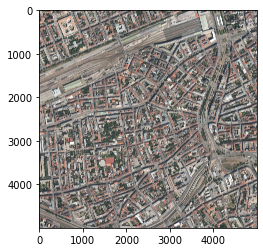

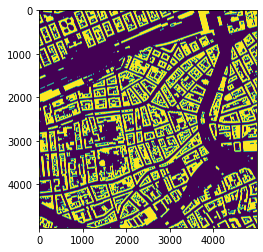

In [8]:
#画像の読み込み
im_image = Image.open(x_train_files[0])

#画像をarrayに変換
im_list_image = np.asarray(im_image)
#貼り付け
plt.imshow(im_list_image)
plt.show()

#アノテーション画像の読み込み
im_gt = Image.open(y_train_files[0])
#画像をarrayに変換
im_list_gt = np.asarray(im_gt)
#貼り付け
plt.imshow(im_list_gt)
#表示
plt.show()

In [10]:
print(im_list_gt)
print(len(im_list_gt))
print(im_list_gt.shape)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
5000
(5000, 5000)


In [12]:
np.unique(im_list_gt)

array([  0, 255], dtype=uint8)

In [15]:
if not os.path.exists('train_images'):
    os.mkdir('train_images')

In [16]:
if not os.path.exists('train_gt'):
    os.mkdir('train_gt')

In [19]:
#分割する画像サイズ，リサイズ画像のサイズ指定
height = 250
width = 250
img_size= len(im_list)

In [30]:
#画像の分割処理関数
def ImgSplit(im):
   

    buff = []
    # 縦の分割枚数
    for h1 in range(int(img_size/height)):
        # 横の分割枚数
        for w1 in range(int(img_size/width)):
            w2 = w1 * height
            h2 = h1 * width
            #print(w2, h2, width + w2, height + h2)
            c = im.crop((w2, h2, width + w2, height + h2))
            buff.append(c)
    return buff

In [31]:
x_train_files[0]

'./images/vienna20.tif'

In [32]:
os.path.splitext(os.path.basename(x_train_files[0]))[0]

'vienna20'

In [35]:
!pwd

/home/shirokawakita/Shiro/building_segmentation/image/train


In [40]:
#撮像画像の分割

for i in range(len(x_train_files)):
# 画像の読み込み
    im=Image.open(x_train_files[i])
    file_name = os.path.splitext(os.path.basename(x_train_files[i]))[0]
    
    #画像の分割処理の実行
    hi=0
    for ig in ImgSplit(im):
        hi=hi+1
        # 保存先フォルダの指定
        ig.save("./train_images/"+ str(file_name) + '_' + str(i) +'_' + str(hi) +".png")


In [41]:
#アノテーション画像の分割

for i in range(len(y_train_files)):
# 画像の読み込み
    im=Image.open(y_train_files[i])
    file_name = os.path.splitext(os.path.basename(y_train_files[i]))[0]
    
    #画像の分割処理の実行
    hi=0
    for ig in ImgSplit(im):
        hi=hi+1
        # 保存先フォルダの指定
        ig.save("./train_gt/"+ str(file_name) + '_' + str(i) +'_' + str(hi) +".png")

In [13]:
DATA_DIR = './image/train/'

x_train_dir = os.path.join(DATA_DIR, 'train_images')
y_train_dir = os.path.join(DATA_DIR, 'train_gt')

x_train_files = glob.glob(x_train_dir +'/*')
y_train_files = glob.glob(y_train_dir +'/*')

len(x_train_files)

In [ ]:
from natsort import natsorted

X_train_files = natsorted(x_train_files)
Y_train_files = natsorted(y_train_files)

print(X_train_files[0])
print(Y_train_files[0])

In [ ]:
import shutil

def move_glob(dst_path, pathname, recursive=True):
    for p in glob.glob(pathname, recursive=recursive):
        shutil.move(p, dst_path)

In [ ]:
move_glob('./image/train/val_images', './image/train/train_images/austin*.png')
move_glob('./image/train/val_gt', './image/train/train_gt/austin*.png')

In [ ]:
x_train_dir = os.path.join(DATA_DIR, 'train_images')
y_train_dir = os.path.join(DATA_DIR, 'train_gt')

x_valid_dir = os.path.join(DATA_DIR, 'val_images')
y_valid_dir = os.path.join(DATA_DIR, 'val_gt')

In [ ]:
#画像の読み込み
im_image = Image.open(x_train_files[0])

#画像をarrayに変換
im_list_image = np.asarray(im_image)
#貼り付け
plt.imshow(im_list_image)
plt.show()

#アノテーション画像の読み込み
im_gt = Image.open(y_train_files[0])
#画像をarrayに変換
im_list_gt = np.asarray(im_gt)
#貼り付け
plt.imshow(im_list_gt)
#表示
plt.show()

In [ ]:
print(im_list)
print(len(im_list))

In [ ]:
#学習用アノテーション画像の二値化処理
for i in range(len(y_train_files)):
    im = Image.open(y_train_files[i])
    im_list = np.asarray(im)
    X = im_list
    Y = np.where(X>1,1,X)
    pil_img = Image.fromarray(Y)
    pil_img.save(y_train_files[i])

#検証用アノテーション画像の二値化処理
for i in range(len(y_val_files)):
    im = Image.open(y_val_files[i])
    im_list = np.asarray(im)
    X = im_list
    Y = np.where(X>1,1,X)
    pil_img = Image.fromarray(Y)
    pil_img.save(y_val_files[i])

In [ ]:
#画像の読み込み
im_gt = Image.open(y_train_files[0])
#画像をarrayに変換
im_list_gt = np.asarray(im_gt)

print(im_list_gt)